In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('./Pulsar.csv')
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Exploratory data analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

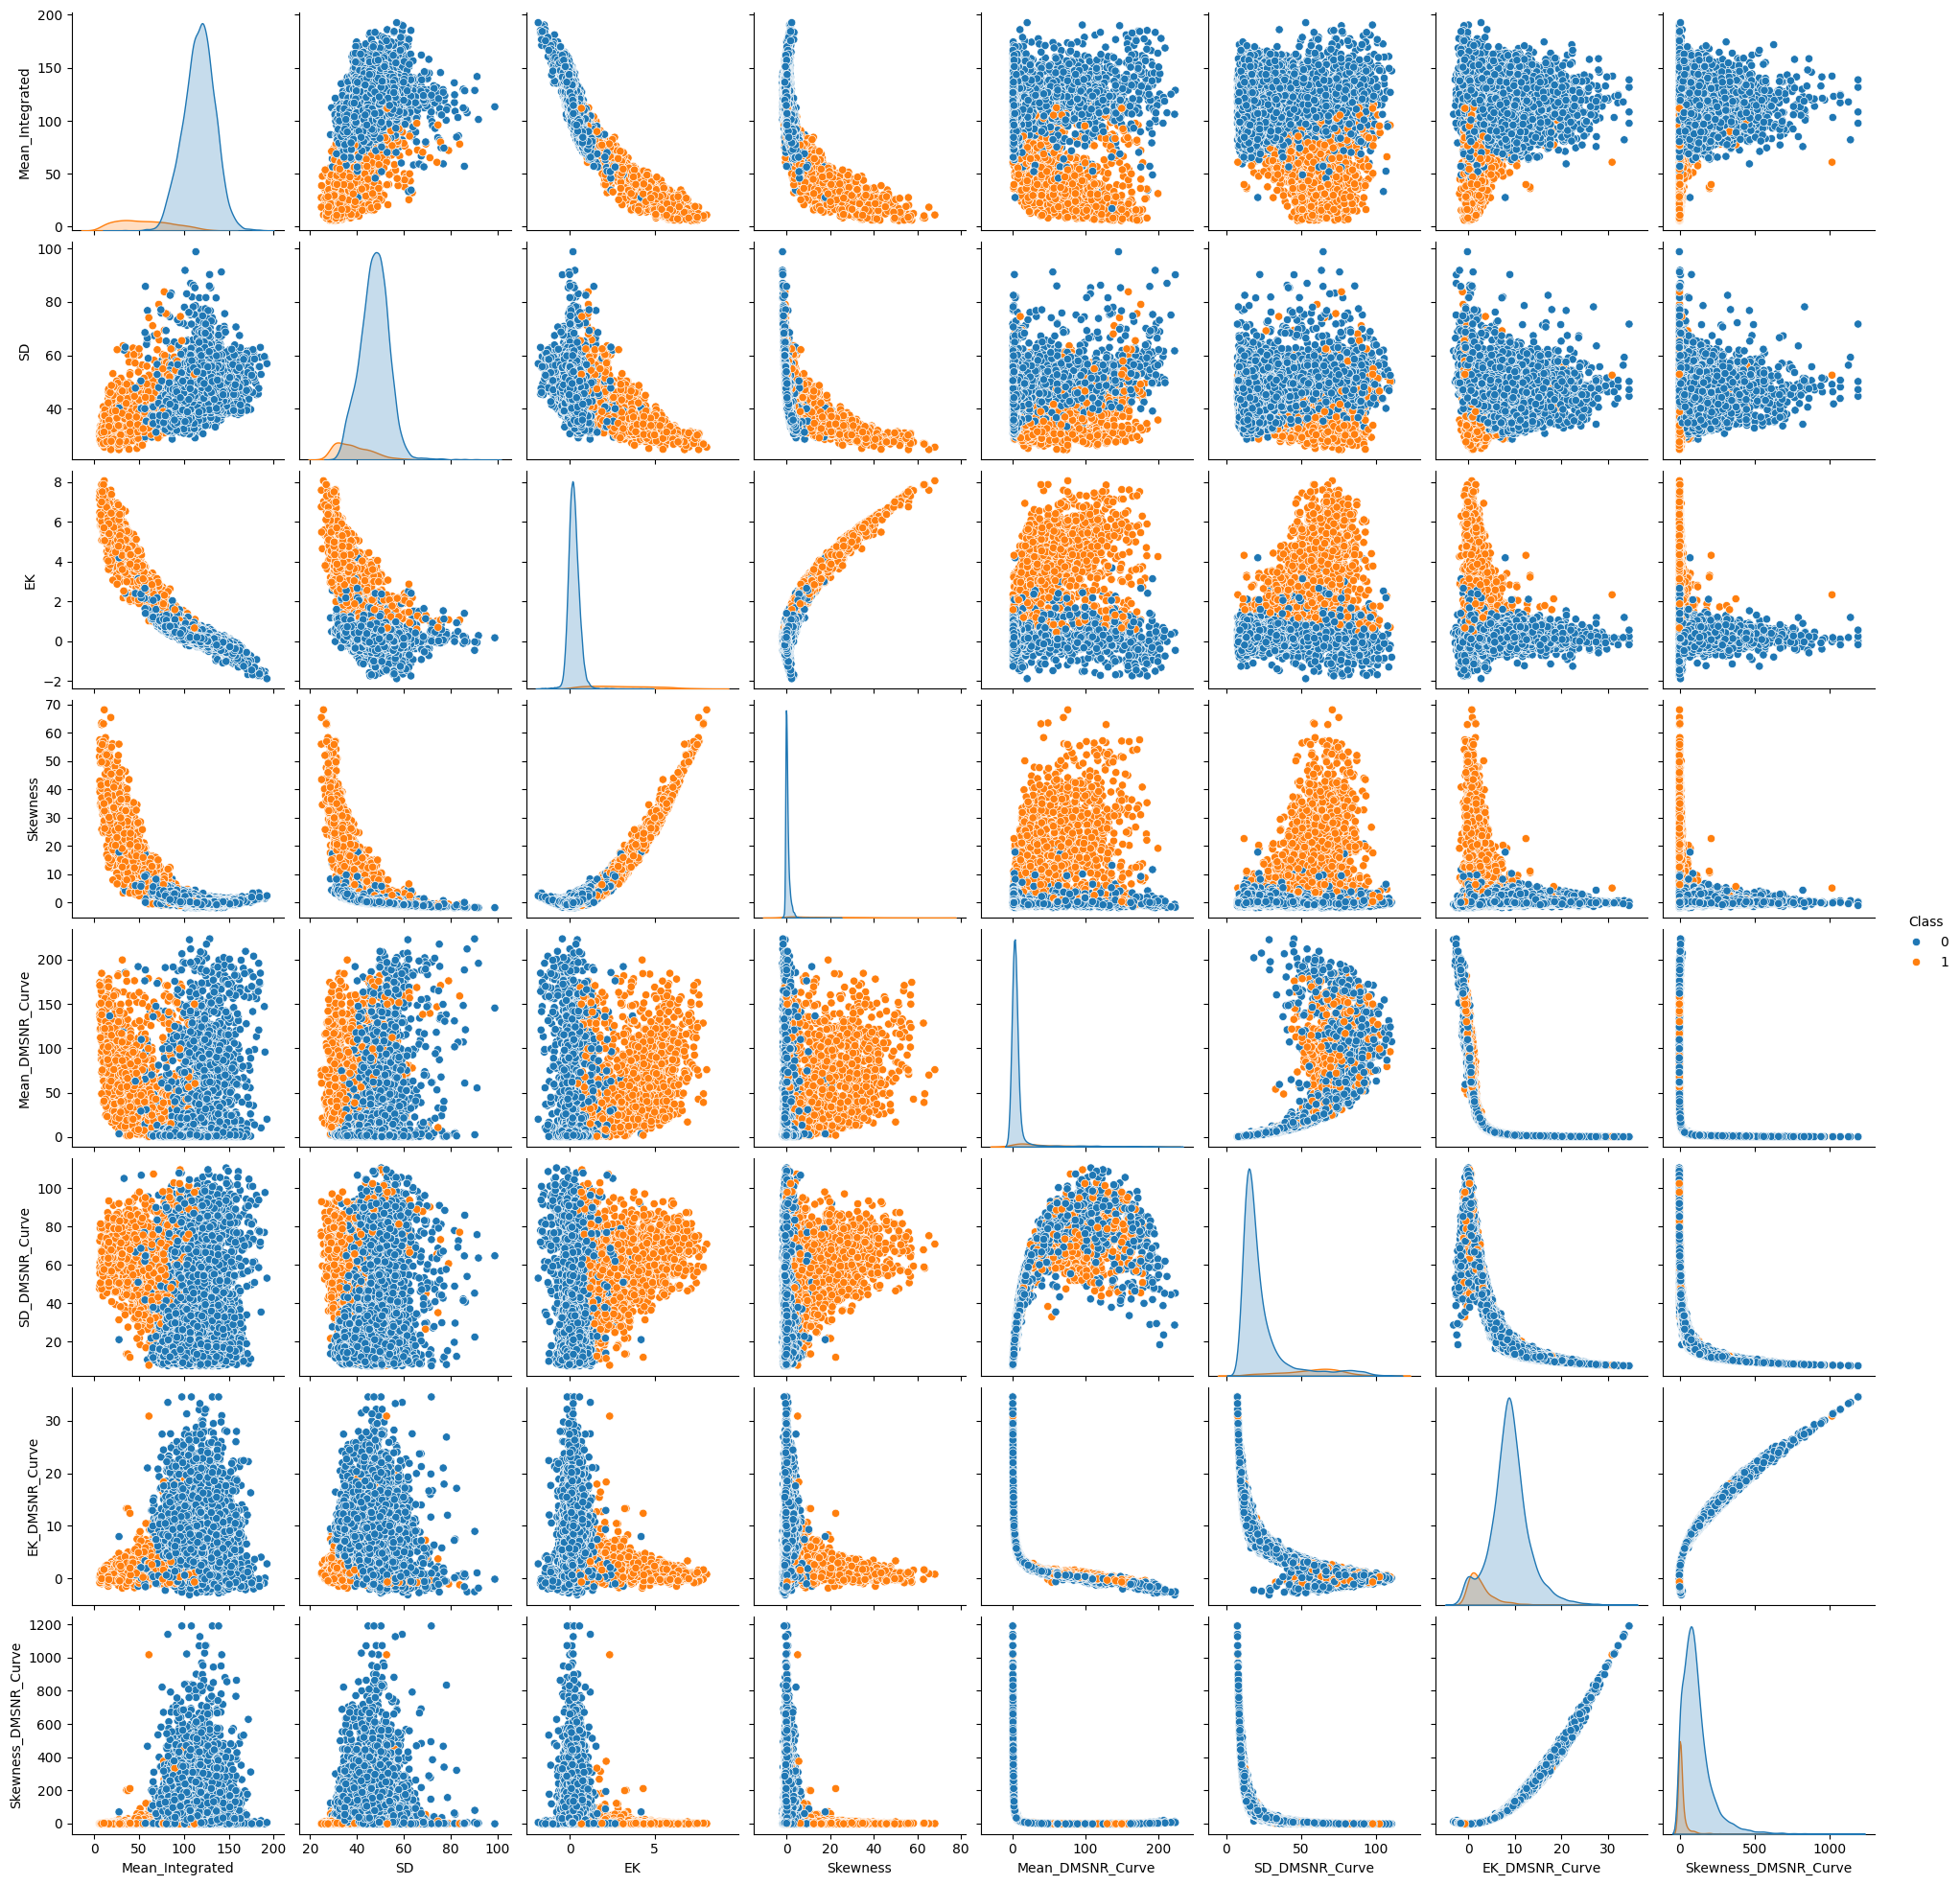

In [33]:
sns.pairplot(data=df, hue='Class')
plt.show()

In [37]:
df.corr()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
Mean_Integrated,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
SD,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
EK,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean_DMSNR_Curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
SD_DMSNR_Curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
EK_DMSNR_Curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness_DMSNR_Curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
Class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


In [35]:
df[df['Class'] == 0].corr()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
Mean_Integrated,1.000000,0.411917,-0.850149,-0.567471,0.117334,0.133887,-0.118461,-0.078315,NaN
SD,0.411917,1.000000,-0.392746,-0.742152,0.235327,0.206339,-0.163745,-0.092591,NaN
EK,-0.850149,-0.392746,1.000000,0.635446,-0.104324,-0.106094,0.092018,0.056721,NaN
Skewness,-0.567471,-0.742152,0.635446,1.000000,-0.046456,-0.061013,0.062418,0.041677,NaN
Mean_DMSNR_Curve,0.117334,0.235327,-0.104324,-0.046456,1.000000,0.776205,-0.552666,-0.300487,NaN
SD_DMSNR_Curve,0.133887,0.206339,-0.106094,-0.061013,0.776205,1.000000,-0.769982,-0.542015,NaN
EK_DMSNR_Curve,-0.118461,-0.163745,0.092018,0.062418,-0.552666,-0.769982,1.000000,0.930240,NaN
Skewness_DMSNR_Curve,-0.078315,-0.092591,0.056721,0.041677,-0.300487,-0.542015,0.930240,1.000000,NaN
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
columns = ['SD','Mean_DMSNR_Curve','SD_DMSNR_Curve','Skewness_DMSNR_Curve','Mean_Integrated']
df[columns].corr()

,SD,Mean_DMSNR_Curve,SD_DMSNR_Curve,Skewness_DMSNR_Curve,Mean_Integrated,EK
SD,1.000000,0.006869,-0.047632,0.027691,0.547137,-0.521435
Mean_DMSNR_Curve,0.006869,1.000000,0.796555,-0.354269,-0.298841,0.414368
SD_DMSNR_Curve,-0.047632,0.796555,1.000000,-0.575800,-0.307016,0.432880
Skewness_DMSNR_Curve,0.027691,-0.354269,-0.575800,1.000000,0.144033,-0.214491
Mean_Integrated,0.547137,-0.298841,-0.307016,0.144033,1.000000,-0.873898
EK,-0.521435,0.414368,0.432880,-0.214491,-0.873898,1.000000


<Axes: >

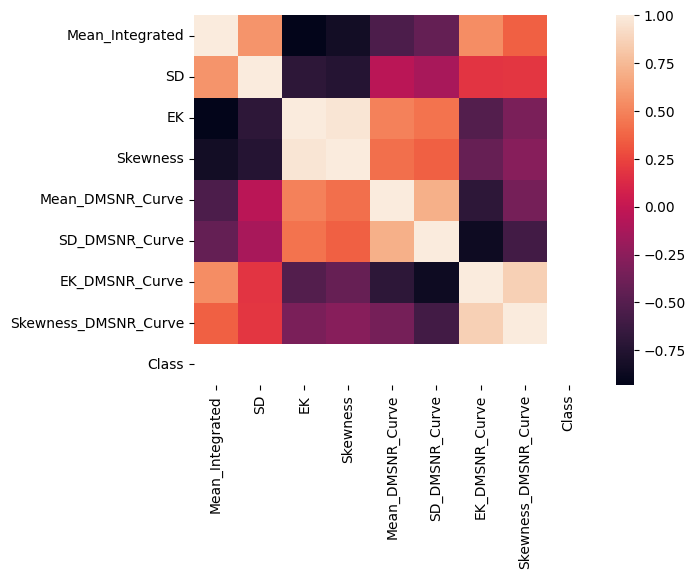

In [38]:
sns.heatmap(df[df['Class'] == 1].corr())

### Data Processing

In [59]:
columns = ['SD','Mean_DMSNR_Curve','SD_DMSNR_Curve','Skewness_DMSNR_Curve','Mean_Integrated', 'Class']
df2 = df[columns].copy()

X_df = df2.iloc[:, :5]
y_df = df2.iloc[:, 5]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.3, random_state=42
)

In [44]:
scaler = StandardScaler()

In [63]:
X_train_normalized = X_train.copy()

In [65]:
X_train_normalized[X_train_normalized.columns.to_list()] = scaler.fit_transform(X_train)

In [66]:
X_train_normalized

,SD,Mean_DMSNR_Curve,SD_DMSNR_Curve,Skewness_DMSNR_Curve,Mean_Integrated
12223,0.272252,-0.321013,-0.403381,-0.377801,0.393989
1919,-1.521273,-0.346990,-0.445787,-0.028570,-1.327257
2753,0.986368,-0.335385,-0.200497,-0.295317,0.761306
17220,0.344739,0.161989,1.443146,-0.916670,1.766787
12110,-1.529786,-0.333804,-0.289804,-0.274308,-1.022022
...,...,...,...,...,...
11284,0.978945,-0.185340,0.155068,-0.781609,0.516935
11964,0.038696,-0.220663,0.204402,-0.664168,0.178225
5390,-0.486353,-0.401514,-0.750014,1.918983,0.194354
860,0.501751,-0.297691,-0.244576,-0.404067,0.959115


### Train model

In [69]:
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

LogisticRegression()

### Test model

In [70]:
X_test_normalized = X_test.copy()
X_test_normalized[X_test_normalized.columns.to_list()] = scaler.transform(X_test)

In [72]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.91


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4884
           1       1.00      0.01      0.03       486

    accuracy                           0.91      5370
   macro avg       0.96      0.51      0.49      5370
weighted avg       0.92      0.91      0.87      5370



In [74]:
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(confusion)

Matriz de confusión:
[[4884    0]
 [ 479    7]]


In [75]:
import joblib

joblib.dump(scaler, 'scaler.pkl') 
joblib.dump(model, 'model.pkl')

['model.pkl']